In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
cwd=os.getcwd()
df=pd.read_csv(cwd+"/filterd_by_jay_customer_booking2.csv",index_col=0)

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df_final=df

1.Oneohotencode the categorial columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder_df=pd.DataFrame(encoder.fit_transform(df[['sales_channel']]).toarray())
encoder_df=encoder_df.rename(columns={0:'internet',1:'mobile'})
df_final=df_final.join(encoder_df)

In [ ]:

encoder_df=pd.DataFrame(encoder.fit_transform(df[['trip_type']]).toarray())
encoder_df=encoder_df.rename(columns={0:'roundtrip',1:'onewaytrip',2:'circletrip'})
df_final=df_final.join(encoder_df)


In [ ]:
df_final.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,internet,mobile,roundtrip,onewaytrip,circletrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0


In [ ]:
label=df['booking_complete']

In [ ]:
df_final.drop(['sales_channel','trip_type','route','booking_complete','booking_origin'],axis=1,inplace=True)

In [ ]:
df_final.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,mobile,roundtrip,onewaytrip,circletrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_final)

In [ ]:
scaled_df=pd.DataFrame(scaled_df,columns=df_final.columns)

In [ ]:
scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,mobile,roundtrip,onewaytrip,circletrip
0,0.400594,1.964979,-0.119575,-0.381719,1.096713,0.703619,-0.649929,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845
1,-0.579556,0.301151,-0.089155,-1.120754,1.096713,-1.421224,-0.649929,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845
2,0.400594,1.754227,-0.028314,1.465867,-0.408681,0.703619,1.538629,-0.863380,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845
3,-0.579556,0.123676,0.245467,-0.935995,1.096713,-1.421224,-0.649929,1.158238,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845
4,0.400594,-0.186906,-0.028314,1.096350,-0.408681,0.703619,-0.649929,1.158238,-1.174015,0.355715,-0.355715,-0.04824,-0.088352,0.100845


In [ ]:
scaled_df['label']=label

correlation matrix

<Axes: >

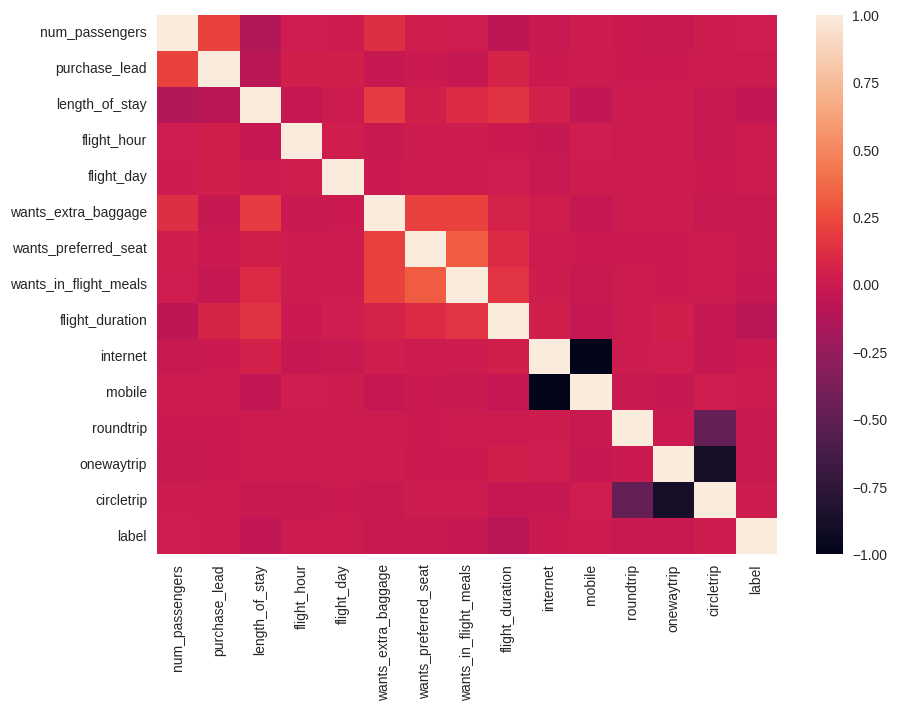

In [ ]:
corr=scaled_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr)

split train and test

In [1]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

NameError: name 'scaled_df' is not defined

In [ ]:
X.shape

(49982, 14)

In [ ]:
label.info()

<class 'pandas.core.series.Series'>
Index: 49982 entries, 0 to 49999
Series name: booking_complete
Non-Null Count  Dtype
--------------  -----
49982 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [ ]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)


In [ ]:
y.fillna(y.mean(), inplace=True)

In [ ]:

#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [ ]:
print(y.dtypes)


float64


In [ ]:
print(label.isnull().sum())

0


In [ ]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

ValueError: Input y contains NaN.

In [ ]:
y.isnull().sum()

np.int64(0)